In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import keras

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Activation, Normalization, Discretization

from sklearn.preprocessing import MinMaxScaler

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
#read in data tables
law=pd.read_csv('lawler.csv')
game=pd.read_csv('games.csv')

pd.options.display.max_columns = 100

#prepare data types to produce unique key
law['HomeTeamId'] = law['HomeTeamId'].astype(str)
law['VisitorTeamId'] = law['VisitorTeamId'].astype(str)

game['HOME_TEAM_ID'] = game['HOME_TEAM_ID'].astype(str)
game['VISITOR_TEAM_ID'] = game['VISITOR_TEAM_ID'].astype(str)

#produce key to join two dataframes
law['Game ID'] = law['GameDate']+law['HomeTeamId']+law['VisitorTeamId']
game['Game ID'] = game['GAME_DATE_EST']+ game['HOME_TEAM_ID'] + game['VISITOR_TEAM_ID']

#merge into singular datframe
law=law.merge(game, on = 'Game ID')

In [3]:
law.columns

Index(['GameDate', 'Home_Abbr', 'Vis_Abbr', 'HomeTeamId', 'VisitorTeamId',
       'Result', 'Lawler Law', '100 Pts', 'HomeTeamScore', 'VisitorTeamScore',
       'WinningTeamId', 'LawlerTeamId', 'HomeTeamScore_Lawler',
       'VisitorTeamScore_Lawler', 'LawlerTimeElapsed',
       'Time_Elapsed pct of game', 'Game ID', 'GAME_DATE_EST', 'GAME_ID',
       'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home',
       'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home',
       'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away',
       'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [57]:
#drop unnecessary columns
todrop=['Game ID', 'GAME_ID', 'LawlerTeamId','GAME_DATE_EST','Time_Elapsed pct of game']
law.drop(todrop, axis=1, inplace=True)

In [58]:
law.head()

,GameDate,Home_Abbr,Vis_Abbr,HomeTeamId,VisitorTeamId,Result,Lawler Law,100 Pts,HomeTeamScore,VisitorTeamScore,WinningTeamId,HomeTeamScore_Lawler,VisitorTeamScore_Lawler,LawlerTimeElapsed,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,10/28/2003,DAL,LAL,1610612747,1610612742,0,1,1,109,93,1610612747,100,84,2545.0,1610612747,1610612742,2003,1610612747,109.0,0.506,0.600,0.350,32.0,46.0,1610612742,93.0,0.376,0.733,0.280,17.0,46.0,1
1,10/28/2003,PHX,SAS,1610612759,1610612756,2,0,0,83,82,1610612759,0,0,0.0,1610612759,1610612756,2003,1610612759,83.0,0.425,0.769,0.100,20.0,38.0,1610612756,82.0,0.361,0.810,0.500,14.0,43.0,1
2,10/28/2003,MIA,PHI,1610612755,1610612748,2,0,0,89,74,1610612755,0,0,0.0,1610612755,1610612748,2003,1610612755,89.0,0.440,0.533,0.350,25.0,39.0,1610612748,74.0,0.408,0.824,0.250,16.0,44.0,1
3,10/29/2003,MIL,MIN,1610612750,1610612749,2,0,0,95,89,1610612750,0,0,0.0,1610612750,1610612749,2003,1610612750,95.0,0.447,0.643,0.167,26.0,47.0,1610612749,89.0,0.422,0.944,0.222,25.0,42.0,1
4,10/29/2003,IND,DET,1610612765,1610612754,2,0,0,87,89,1610612754,0,0,0.0,1610612765,1610612754,2003,1610612765,87.0,0.392,0.742,0.333,15.0,40.0,1610612754,89.0,0.456,0.667,0.500,18.0,39.0,0


In [59]:

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer=imputer.fit(law[['LawlerTimeElapsed']])
law['LawlerTimeElapsed']= imputer.transform(law[['LawlerTimeElapsed']])


In [60]:
#identify data and target
X = law.iloc[:,8:len(law)]
y = law.iloc[:, 5]

In [9]:
y

0        0
1        2
2        2
3        2
4        2
        ..
24253    1
24254    1
24255    0
24256    0
24257    0
Name: Result, Length: 24258, dtype: int64

In [11]:
y_lawler = law.groupby('SEASON')['Lawler Law'].mean()

In [12]:
x_lawler = law['SEASON'].unique()

<AxesSubplot:ylabel='Lawler Law'>

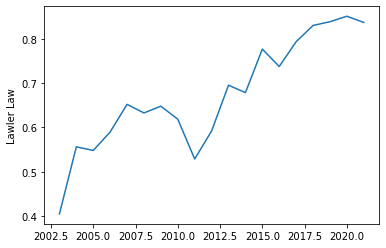

In [13]:
sns.lineplot(x=x_lawler,y=y_lawler)

In [78]:
law.groupby('SEASON')['100 Pts'].mean()

SEASON
2003    0.463415
2004    0.621005
2005    0.610311
2006    0.658518
2007    0.713526
2008    0.702662
2009    0.711890
2010    0.684211
2011    0.592179
2012    0.984018
2013    0.764215
2014    1.000000
2015    1.000000
2016    1.000000
2017    1.000000
2018    1.000000
2019    1.000000
2020    1.000000
2021    1.000000
Name: 100 Pts, dtype: float64

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

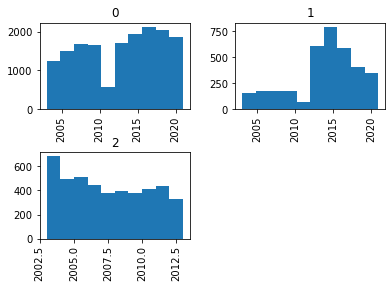

In [8]:
law.hist(column='SEASON', by='Result')

In [11]:
sns.distplot(data=law,x='SEASON',y='Result')

TypeError: distplot() got an unexpected keyword argument 'data'

<AxesSubplot:xlabel='SEASON', ylabel='100 Pts'>

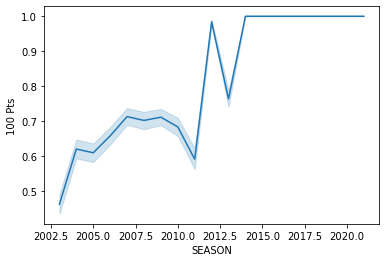

In [17]:
sns.lineplot(data=law,x='SEASON',y='100 Pts')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='count'>

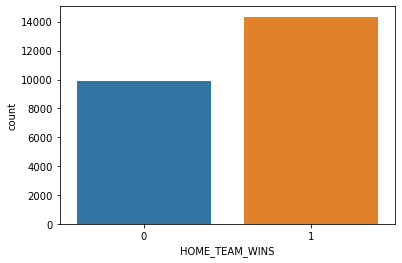

In [23]:
sns.countplot(law['HOME_TEAM_WINS'])

In [24]:
law.head(5)

,GameDate,Home_Abbr,Vis_Abbr,HomeTeamId,VisitorTeamId,Result,Lawler Law,100 Pts,HomeTeamScore,VisitorTeamScore,WinningTeamId,LawlerTeamId,HomeTeamScore_Lawler,VisitorTeamScore_Lawler,LawlerTimeElapsed,Time_Elapsed pct of game,Game ID,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,10/28/2003,DAL,LAL,1610612747,1610612742,0,1,1,109,93,1610612747,1.610613e+09,100,84,2545.0,0.883680556,10/28/200316106127471610612742,10/28/2003,20300003,1610612747,1610612742,2003,1610612747,109.0,0.506,0.600,0.350,32.0,46.0,1610612742,93.0,0.376,0.733,0.280,17.0,46.0,1
1,10/28/2003,PHX,SAS,1610612759,1610612756,2,0,0,83,82,1610612759,0.000000e+00,0,0,0.0,0,10/28/200316106127591610612756,10/28/2003,20300002,1610612759,1610612756,2003,1610612759,83.0,0.425,0.769,0.100,20.0,38.0,1610612756,82.0,0.361,0.810,0.500,14.0,43.0,1
2,10/28/2003,MIA,PHI,1610612755,1610612748,2,0,0,89,74,1610612755,0.000000e+00,0,0,0.0,0,10/28/200316106127551610612748,10/28/2003,20300001,1610612755,1610612748,2003,1610612755,89.0,0.440,0.533,0.350,25.0,39.0,1610612748,74.0,0.408,0.824,0.250,16.0,44.0,1
3,10/29/2003,MIL,MIN,1610612750,1610612749,2,0,0,95,89,1610612750,0.000000e+00,0,0,0.0,0,10/29/200316106127501610612749,10/29/2003,20300009,1610612750,1610612749,2003,1610612750,95.0,0.447,0.643,0.167,26.0,47.0,1610612749,89.0,0.422,0.944,0.222,25.0,42.0,1
4,10/29/2003,IND,DET,1610612765,1610612754,2,0,0,87,89,1610612754,0.000000e+00,0,0,0.0,0,10/29/200316106127651610612754,10/29/2003,20300008,1610612765,1610612754,2003,1610612765,87.0,0.392,0.742,0.333,15.0,40.0,1610612754,89.0,0.456,0.667,0.500,18.0,39.0,0


In [25]:
law.describe()

,Result,Lawler Law,100 Pts,HomeTeamScore,VisitorTeamScore,WinningTeamId,LawlerTeamId,HomeTeamScore_Lawler,VisitorTeamScore_Lawler,LawlerTimeElapsed,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
count,24258.000000,24258.000000,24258.000000,24258.000000,24258.000000,2.425800e+04,2.224000e+04,24258.000000,24258.000000,23825.000000,2.425800e+04,24258.000000,2.425800e+04,24258.000000,24258.000000,24258.000000,24258.000000,24258.000000,24258.000000,2.425800e+04,24258.000000,24258.000000,24258.000000,24258.000000,24258.000000,24258.000000,24258.000000
mean,0.511914,0.672397,0.815690,103.255833,100.386965,1.610613e+09,1.286825e+09,70.116044,67.721989,1923.897419,2.225883e+07,2011.848009,1.610613e+09,103.262099,0.461135,0.761128,0.356617,22.786091,43.358397,1.610613e+09,100.394056,0.449961,0.759383,0.350010,21.441957,42.070698,0.591228
std,0.786450,0.469349,0.387745,13.148287,13.315176,8.634848e+00,6.455055e+08,42.884260,41.730910,1142.608838,4.924324e+06,5.396810,8.644766e+00,13.140743,0.056381,0.100439,0.111635,5.189381,6.613993,8.645321e+00,13.309468,0.055284,0.103349,0.109617,5.145918,6.524295,0.491617
min,0.000000,0.000000,0.000000,39.000000,35.000000,1.610613e+09,0.000000e+00,0.000000,0.000000,0.000000,1.150000e+07,2003.000000,1.610613e+09,59.000000,0.250000,0.143000,0.000000,6.000000,17.000000,1.610613e+09,54.000000,0.244000,0.143000,0.000000,4.000000,20.000000,0.000000
25%,0.000000,0.000000,1.000000,94.000000,91.000000,1.610613e+09,1.610613e+09,0.000000,0.000000,0.000000,2.070088e+07,2007.000000,1.610613e+09,94.000000,0.422000,0.700000,0.286000,19.000000,39.000000,1.610613e+09,91.000000,0.413000,0.694000,0.278000,18.000000,38.000000,0.000000
50%,0.000000,1.000000,1.000000,103.000000,100.000000,1.610613e+09,1.610613e+09,96.000000,89.000000,2486.000000,2.120103e+07,2012.000000,1.610613e+09,103.000000,0.460000,0.767000,0.357000,23.000000,43.000000,1.610613e+09,100.000000,0.449000,0.765000,0.350000,21.000000,42.000000,1.000000
75%,1.000000,1.000000,1.000000,112.000000,109.000000,1.610613e+09,1.610613e+09,100.000000,100.000000,2717.000000,2.170095e+07,2016.000000,1.610613e+09,112.000000,0.500000,0.833000,0.429000,26.000000,48.000000,1.610613e+09,109.000000,0.487000,0.833000,0.421000,25.000000,46.000000,1.000000
max,2.000000,1.000000,1.000000,168.000000,168.000000,1.610613e+09,1.610613e+09,102.000000,102.000000,3475.000000,5.200021e+07,2021.000000,1.610613e+09,168.000000,0.684000,1.000000,1.000000,50.000000,72.000000,1.610613e+09,168.000000,0.687000,1.000000,1.000000,46.000000,81.000000,1.000000


In [52]:
law['Result'] == 0

0         True
1        False
2        False
3        False
4        False
         ...  
24253    False
24254    False
24255     True
24256     True
24257     True
Name: Result, Length: 24258, dtype: bool

In [53]:
law['Home_Abbr'].unique()

array(['DAL', 'PHX', 'MIA', 'MIL', 'IND', 'ORL', 'CLE', 'WAS', 'SAS',
       'POR', 'NJN', 'ATL', 'DEN', 'NOH', 'LAC', 'PHI', 'DET', 'MIN',
       'SEA', 'BOS', 'NYK', 'LAL', 'TOR', 'MEM', 'UTA', 'SAC', 'CHI',
       'GSW', 'HOU', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'], dtype=object)

In [54]:
#read in data tables
law=pd.read_csv('lawler.csv')
game=pd.read_csv('games.csv')

pd.options.display.max_columns = 100

#prepare data types to produce unique key
law['HomeTeamId'] = law['HomeTeamId'].astype(str)
law['VisitorTeamId'] = law['VisitorTeamId'].astype(str)

game['HOME_TEAM_ID'] = game['HOME_TEAM_ID'].astype(str)
game['VISITOR_TEAM_ID'] = game['VISITOR_TEAM_ID'].astype(str)

#produce key to join two dataframes
law['Game ID'] = law['GameDate']+law['HomeTeamId']+law['VisitorTeamId']
game['Game ID'] = game['GAME_DATE_EST']+ game['HOME_TEAM_ID'] + game['VISITOR_TEAM_ID']

#merge into singular datframe
law=law.merge(game, on = 'Game ID')

In [66]:
law['minutes'] = (law['LawlerTimeElapsed'] > 0 )/60


In [67]:
law.head(40)

,GameDate,Home_Abbr,Vis_Abbr,HomeTeamId,VisitorTeamId,Result,Lawler Law,100 Pts,HomeTeamScore,VisitorTeamScore,WinningTeamId,LawlerTeamId,HomeTeamScore_Lawler,VisitorTeamScore_Lawler,LawlerTimeElapsed,Time_Elapsed pct of game,Game ID,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,minutes
0,10/28/2003,DAL,LAL,1610612747,1610612742,0,1,1,109,93,1610612747,1.610613e+09,100,84,2545.0,0.883680556,10/28/200316106127471610612742,10/28/2003,20300003,1610612747,1610612742,2003,1610612747,109.0,0.506,0.600,0.350,32.0,46.0,1610612742,93.0,0.376,0.733,0.280,17.0,46.0,1,0.016667
1,10/28/2003,PHX,SAS,1610612759,1610612756,2,0,0,83,82,1610612759,0.000000e+00,0,0,0.0,0,10/28/200316106127591610612756,10/28/2003,20300002,1610612759,1610612756,2003,1610612759,83.0,0.425,0.769,0.100,20.0,38.0,1610612756,82.0,0.361,0.810,0.500,14.0,43.0,1,0.000000
2,10/28/2003,MIA,PHI,1610612755,1610612748,2,0,0,89,74,1610612755,0.000000e+00,0,0,0.0,0,10/28/200316106127551610612748,10/28/2003,20300001,1610612755,1610612748,2003,1610612755,89.0,0.440,0.533,0.350,25.0,39.0,1610612748,74.0,0.408,0.824,0.250,16.0,44.0,1,0.000000
3,10/29/2003,MIL,MIN,1610612750,1610612749,2,0,0,95,89,1610612750,0.000000e+00,0,0,0.0,0,10/29/200316106127501610612749,10/29/2003,20300009,1610612750,1610612749,2003,1610612750,95.0,0.447,0.643,0.167,26.0,47.0,1610612749,89.0,0.422,0.944,0.222,25.0,42.0,1,0.000000
4,10/29/2003,IND,DET,1610612765,1610612754,2,0,0,87,89,1610612754,0.000000e+00,0,0,0.0,0,10/29/200316106127651610612754,10/29/2003,20300008,1610612765,1610612754,2003,1610612765,87.0,0.392,0.742,0.333,15.0,40.0,1610612754,89.0,0.456,0.667,0.500,18.0,39.0,0,0.000000
5,10/29/2003,ORL,NYK,1610612752,1610612753,2,0,0,83,85,1610612753,0.000000e+00,0,0,0.0,0,10/29/200316106127521610612753,10/29/2003,20300005,1610612752,1610612753,2003,1610612752,83.0,0.400,0.824,0.313,20.0,48.0,1610612753,85.0,0.368,0.552,0.250,17.0,44.0,0,0.000000
6,10/29/2003,CLE,SAC,1610612758,1610612739,0,1,1,106,92,1610612758,1.610613e+09,100,92,2684.0,0.931944444,10/29/200316106127581610612739,10/29/2003,20300014,1610612758,1610612739,2003,1610612758,106.0,0.506,0.800,0.222,27.0,41.0,1610612739,92.0,0.465,0.667,0.545,24.0,39.0,1,0.016667
7,10/29/2003,WAS,CHI,1610612741,1610612764,2,0,0,74,99,1610612764,0.000000e+00,0,0,0.0,0,10/29/200316106127411610612764,10/29/2003,20300010,1610612741,1610612764,2003,1610612741,74.0,0.317,0.613,0.231,16.0,47.0,1610612764,99.0,0.487,0.667,0.417,25.0,48.0,0,0.000000
8,10/29/2003,MIA,BOS,1610612738,1610612748,2,0,0,98,75,1610612738,0.000000e+00,0,0,0.0,0,10/29/200316106127381610612748,10/29/2003,20300004,1610612738,1610612748,2003,1610612738,98.0,0.507,0.731,0.313,28.0,40.0,1610612748,75.0,0.366,0.750,0.417,14.0,39.0,1,0.000000
9,10/29/2003,SAS,DEN,1610612743,1610612759,2,0,0,80,72,1610612743,0.000000e+00,0,0,0.0,0,10/29/200316106127431610612759,10/29/2003,20300011,1610612743,1610612759,2003,1610612743,80.0,0.292,0.690,0.400,17.0,66.0,1610612759,72.0,0.268,0.783,0.154,14.0,60.0,1,0.000000


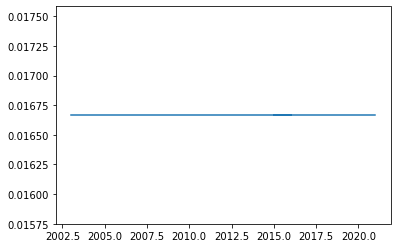

In [68]:

y_time = law[(law['minutes'])>0]
y_time = y_time.groupby('SEASON')['minutes'].mean()
x_time = law['SEASON'].unique()
p = plt.plot(x_time,y_time)


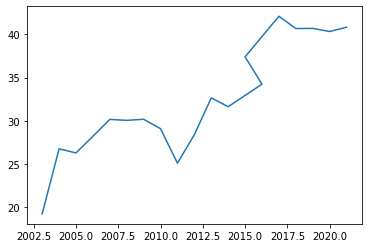

In [101]:
plt.plot(x_time,y_time)

Text(0.5, 0, 'Season')

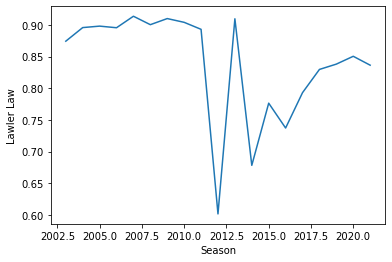

In [28]:
y_law = law[(law['Result'])<2]
y_law = y_law.groupby('SEASON')['Lawler Law'].mean()
x_time = law['SEASON'].unique()
p = sns.lineplot(x=x_time,y=y_law)
p.set_xlabel('Season')

In [22]:
law['avg_points'] = (law['HomeTeamScore'] + law['VisitorTeamScore'])/2

In [24]:
law.head()

,GameDate,Home_Abbr,Vis_Abbr,HomeTeamId,VisitorTeamId,Result,Lawler Law,100 Pts,HomeTeamScore,VisitorTeamScore,WinningTeamId,HomeTeamScore_Lawler,VisitorTeamScore_Lawler,LawlerTimeElapsed,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,avg_points
0,10/28/2003,DAL,LAL,1610612747,1610612742,0,1,1,109,93,1610612747,100,84,2545.0,1610612747,1610612742,2003,1610612747,109.0,0.506,0.600,0.350,32.0,46.0,1610612742,93.0,0.376,0.733,0.280,17.0,46.0,1,101.0
1,10/28/2003,PHX,SAS,1610612759,1610612756,2,0,0,83,82,1610612759,0,0,0.0,1610612759,1610612756,2003,1610612759,83.0,0.425,0.769,0.100,20.0,38.0,1610612756,82.0,0.361,0.810,0.500,14.0,43.0,1,82.5
2,10/28/2003,MIA,PHI,1610612755,1610612748,2,0,0,89,74,1610612755,0,0,0.0,1610612755,1610612748,2003,1610612755,89.0,0.440,0.533,0.350,25.0,39.0,1610612748,74.0,0.408,0.824,0.250,16.0,44.0,1,81.5
3,10/29/2003,MIL,MIN,1610612750,1610612749,2,0,0,95,89,1610612750,0,0,0.0,1610612750,1610612749,2003,1610612750,95.0,0.447,0.643,0.167,26.0,47.0,1610612749,89.0,0.422,0.944,0.222,25.0,42.0,1,92.0
4,10/29/2003,IND,DET,1610612765,1610612754,2,0,0,87,89,1610612754,0,0,0.0,1610612765,1610612754,2003,1610612765,87.0,0.392,0.742,0.333,15.0,40.0,1610612754,89.0,0.456,0.667,0.500,18.0,39.0,0,88.0


Text(0.5, 0, 'Season')

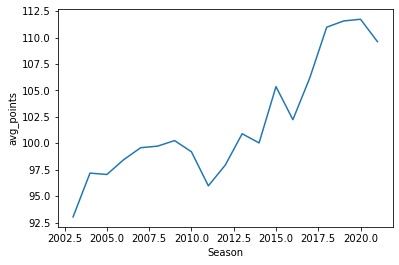

In [29]:
score_avg = law.groupby('SEASON')['avg_points'].mean()
p = sns.lineplot(x=x_time,y=score_avg)
p.set_xlabel('Season')

In [31]:
law['fgpct'] = (law['FG_PCT_home'] + law['FG_PCT_away'])/2
law['fg3pct'] = (law['FG3_PCT_home'] + law['FG3_PCT_away'])/2

In [32]:
fgpct = law.groupby('SEASON')['fgpct'].mean()
fg3pct = law.groupby('SEASON')['fg3pct'].mean()

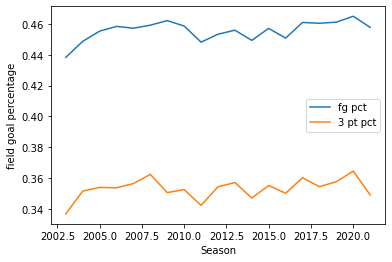

In [43]:
p = sns.lineplot(x=x_time,y=fgpct)
sns.lineplot(x=x_time,y=fg3pct)
p.set_ylabel('field goal percentage')
p.set_xlabel('Season')
p.legend(labels=["fg pct","3 pt pct"])

Text(0, 0.5, '3 point percentage')

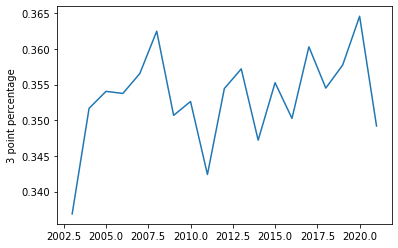

In [39]:
p = sns.lineplot(x=x_time,y=fg3pct)
p.set_ylabel('3 point percentage')